In [71]:
import json

In [72]:
with open('Model_LR_Finder_stats.json') as f:
    y=json.load(f)

In [73]:
y.keys()

dict_keys(['batch_train_samples', 'test_acc', 'batch_train_loss', 'batch_val_acc', 'best_test_loss', 'lr', 'avg_test_loss', 'batch_val_loss', 'batch_lr', 'avg_train_loss', 'batch_train_acc', 'val_samples_seen', 'train_acc', 'epochs'])

In [74]:
import pandas as pd

In [75]:
Batch_Data=pd.DataFrame.from_items(y, columns=['batch_train_samples', 'val_samples_seen', 'batch_train_loss', 'batch_val_acc', 'batch_val_loss', 'batch_lr', 'batch_train_acc'])

In [76]:
Batch_Data['batch_train_loss']=Batch_Data['batch_train_loss']/Batch_Data['batch_train_samples']
#Batch_Data['batch_val_loss']=(Batch_Data['batch_val_loss']*Batch_Data['val_samples_seen'])/30000
#Batch_Data['batch_val_acc']=(Batch_Data['batch_val_acc']*Batch_Data['val_samples_seen'])/30000
Batch_Data['batch_train_acc']=Batch_Data['batch_train_acc']/Batch_Data['batch_train_samples']

In [77]:
Batch_Data.columns

Index(['batch_train_samples', 'val_samples_seen', 'batch_train_loss',
       'batch_val_acc', 'batch_val_loss', 'batch_lr', 'batch_train_acc'],
      dtype='object')

In [78]:
Epoch_Data=pd.DataFrame.from_items(y, columns=['test_acc', 'lr', 'avg_test_loss', 'avg_train_loss','train_acc', 'epochs'])

In [79]:
Epoch_Data

,test_acc,lr,avg_test_loss,avg_train_loss,train_acc,epochs
0,0.0115,0.021971,0.111119,0.010370,0.005786,4
1,0.0233,0.047996,0.104778,0.010095,0.014886,4
2,0.0373,0.104851,0.101829,0.009633,0.031557,4
3,0.0367,0.229055,0.100563,0.009874,0.022214,4


In [80]:
Total = Batch_Data.merge(Epoch_Data,left_on='batch_lr', right_on='lr', how='left')

In [81]:
Total.to_csv('Sample_lr.csv', index=False)

In [82]:
Total.fillna(method='ffill',inplace=True)

In [86]:
import matplotlib.pyplot as plt
#plt.plot(Total['batch_lr'],Total['batch_train_loss'])
#plt.plot(Total['batch_lr'],Total['batch_val_loss'])
plt.plot(Total['batch_lr'],Total['avg_test_loss'])

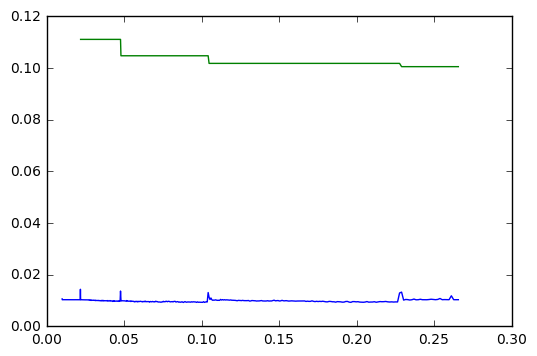

In [87]:
plt.show()